In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=150) # reduced this to 150 from 1500 to save processing time
lngs = np.random.uniform(low=-90.000, high=90.000, size=150) # same as above ^^^
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add coordinates to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

106

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print (url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc797a2fbf4b1b0fbfc5ab3d82b4397c


In [8]:
# Import the time library and the datetime odule from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginnng of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval    
----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | paamiut
Processing Record 2 of Set 1 | korla
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | alexandria
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | takoradi
Processing Record 7 of Set 1 | saint-pierre
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | lenggries
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | bayonet point
Processing Record 15 of Set 1 | poitiers
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | marsa matruh
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | eyl
Processing Record 22 of Set 1 | mubi
Processing Record 23 of Set 1 | sosua

In [11]:
print(len(city_data))

98


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paamiut,61.9940,-49.6678,14.90,71,33,7.85,GL,2023-03-09 02:48:11
1,Korla,41.7597,86.1469,50.16,42,100,4.94,CN,2023-03-09 02:48:12
2,Port Alfred,-33.5906,26.8910,65.25,75,0,2.24,ZA,2023-03-09 02:48:13
3,Alexandria,31.2156,29.9553,54.14,58,69,11.14,EG,2023-03-09 02:48:13
4,Takoradi,4.8845,-1.7554,79.16,88,19,5.23,GH,2023-03-09 02:48:14
5,Saint-Pierre,-21.3393,55.4781,78.48,73,75,11.50,RE,2023-03-09 02:48:15
6,Qaanaaq,77.4840,-69.3632,4.48,67,14,7.61,GL,2023-03-09 02:48:15
7,Hithadhoo,-0.6000,73.0833,82.29,75,83,9.31,MV,2023-03-09 02:48:16
8,Lenggries,47.6833,11.5667,50.43,87,95,6.85,DE,2023-03-09 02:48:16
9,Ushuaia,-54.8000,-68.3000,42.46,81,40,4.61,AR,2023-03-09 02:45:56


In [13]:
# Reorder the columns in the DataFrame
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paamiut,GL,2023-03-09 02:48:11,61.9940,-49.6678,14.90,71,33,7.85
1,Korla,CN,2023-03-09 02:48:12,41.7597,86.1469,50.16,42,100,4.94
2,Port Alfred,ZA,2023-03-09 02:48:13,-33.5906,26.8910,65.25,75,0,2.24
3,Alexandria,EG,2023-03-09 02:48:13,31.2156,29.9553,54.14,58,69,11.14
4,Takoradi,GH,2023-03-09 02:48:14,4.8845,-1.7554,79.16,88,19,5.23
5,Saint-Pierre,RE,2023-03-09 02:48:15,-21.3393,55.4781,78.48,73,75,11.50
6,Qaanaaq,GL,2023-03-09 02:48:15,77.4840,-69.3632,4.48,67,14,7.61
7,Hithadhoo,MV,2023-03-09 02:48:16,-0.6000,73.0833,82.29,75,83,9.31
8,Lenggries,DE,2023-03-09 02:48:16,47.6833,11.5667,50.43,87,95,6.85
9,Ushuaia,AR,2023-03-09 02:45:56,-54.8000,-68.3000,42.46,81,40,4.61


In [14]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

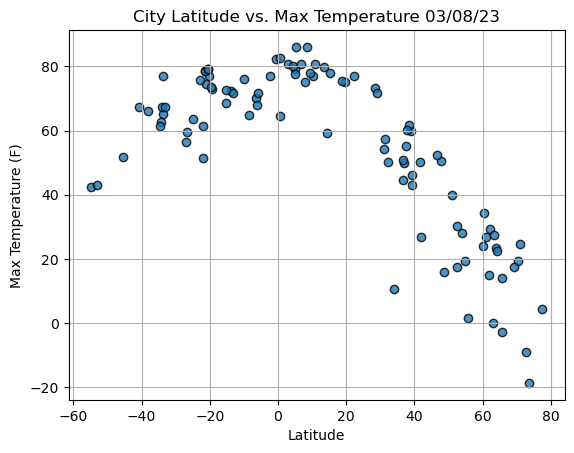

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

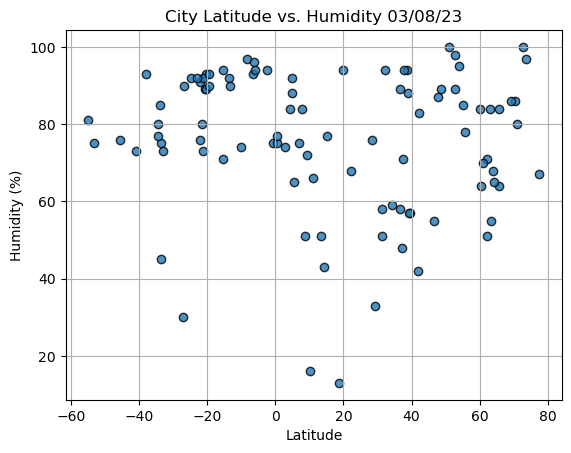

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

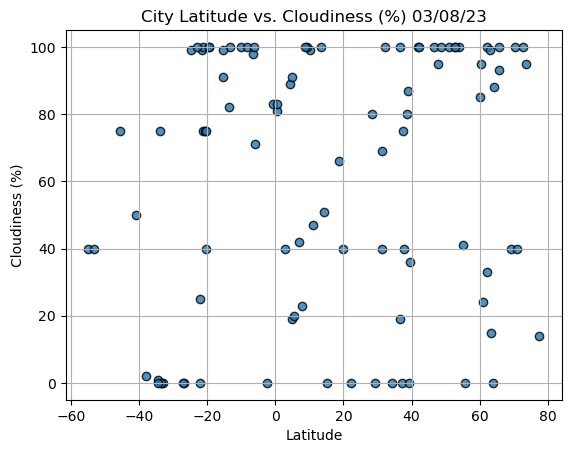

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

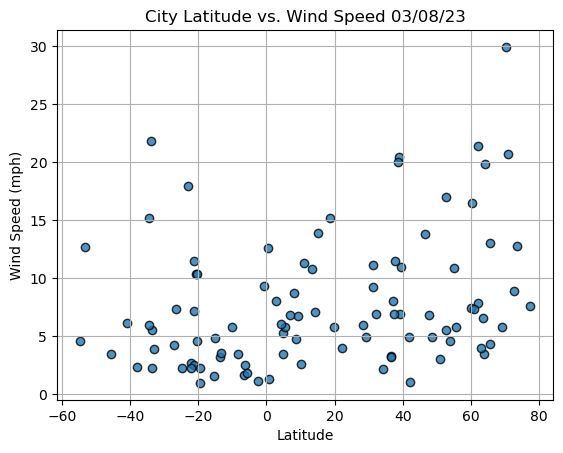

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the date
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                     Poitiers
Country                        FR
Date          2023-03-09 02:48:19
Lat                       46.5833
Lng                        0.3333
Max Temp                    52.25
Humidity                       55
Cloudiness                    100
Wind Speed                   13.8
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      True
1      True
2     False
3      True
4      True
      ...  
93    False
94     True
95     True
96    False
97    False
Name: Lat, Length: 98, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paamiut,GL,2023-03-09 02:48:11,61.9940,-49.6678,14.90,71,33,7.85
1,Korla,CN,2023-03-09 02:48:12,41.7597,86.1469,50.16,42,100,4.94
3,Alexandria,EG,2023-03-09 02:48:13,31.2156,29.9553,54.14,58,69,11.14
4,Takoradi,GH,2023-03-09 02:48:14,4.8845,-1.7554,79.16,88,19,5.23
6,Qaanaaq,GL,2023-03-09 02:48:15,77.4840,-69.3632,4.48,67,14,7.61
...,...,...,...,...,...,...,...,...,...
90,Makinsk,KZ,2023-03-09 02:50:03,52.6292,70.4169,17.40,89,100,17.00
91,Vila Do Maio,CV,2023-03-09 02:50:03,15.1333,-23.2167,77.79,77,0,13.85
92,Atasu,KZ,2023-03-09 02:51:04,48.6814,71.6433,15.89,89,100,4.94
94,Rabo De Peixe,PT,2023-03-09 02:51:05,37.8000,-25.5833,60.31,94,40,11.50


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paamiut,GL,2023-03-09 02:48:11,61.9940,-49.6678,14.90,71,33,7.85
1,Korla,CN,2023-03-09 02:48:12,41.7597,86.1469,50.16,42,100,4.94
3,Alexandria,EG,2023-03-09 02:48:13,31.2156,29.9553,54.14,58,69,11.14
4,Takoradi,GH,2023-03-09 02:48:14,4.8845,-1.7554,79.16,88,19,5.23
6,Qaanaaq,GL,2023-03-09 02:48:15,77.4840,-69.3632,4.48,67,14,7.61


In [25]:
# Create Northern and Southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

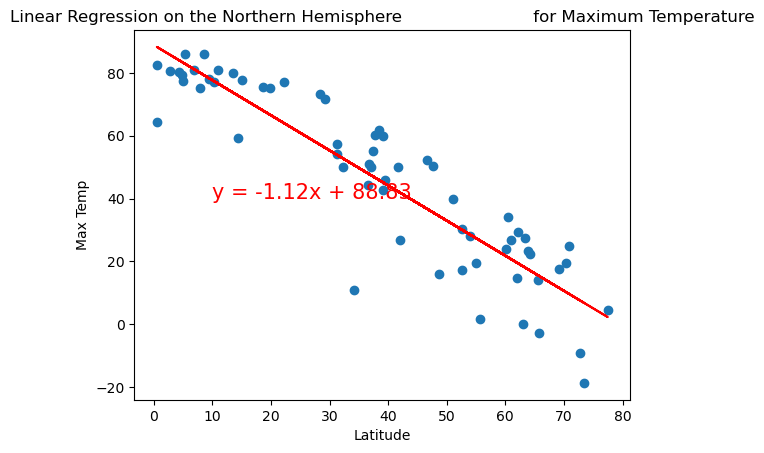

In [26]:
# Import linear regression from teh SciPy stats module
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

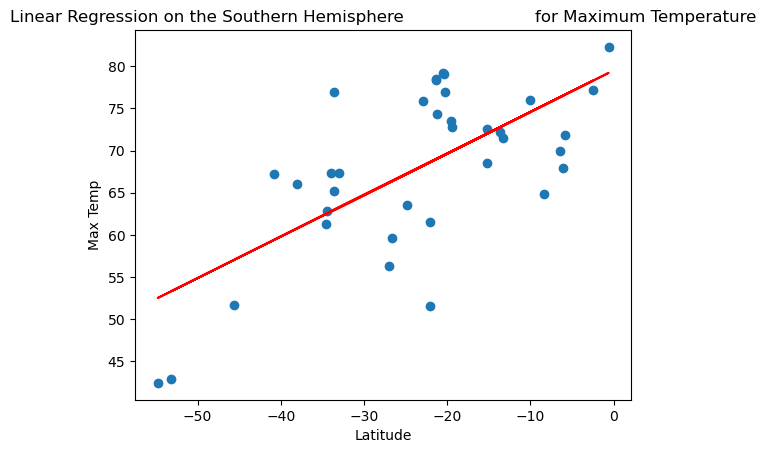

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

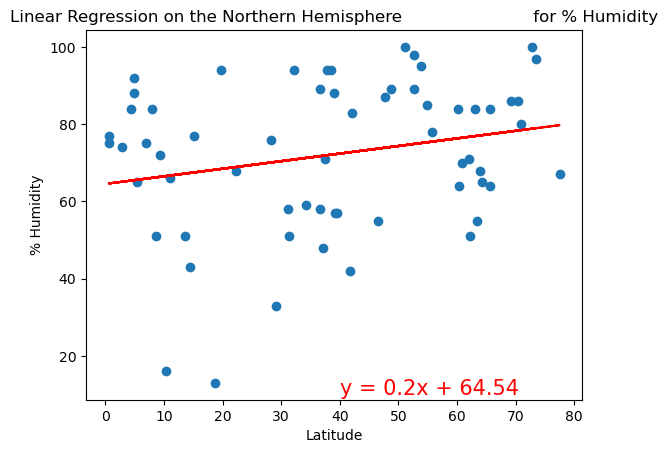

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

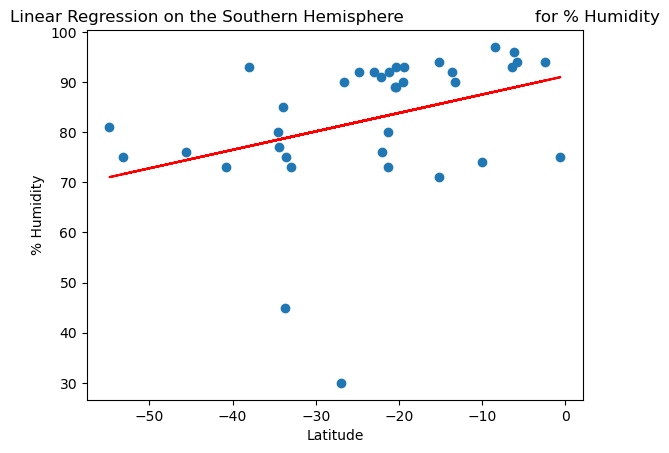

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

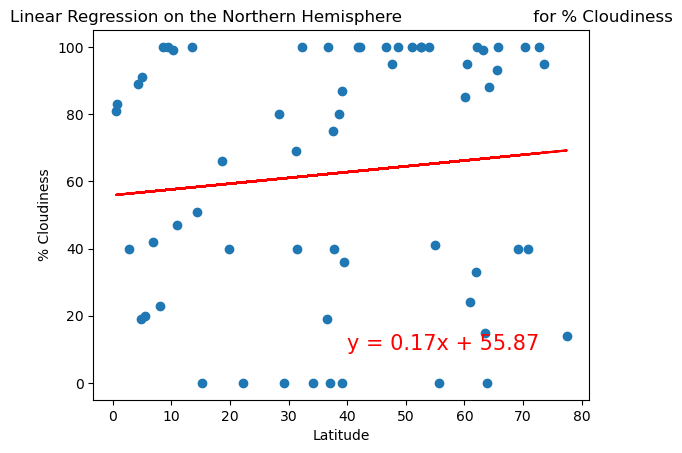

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

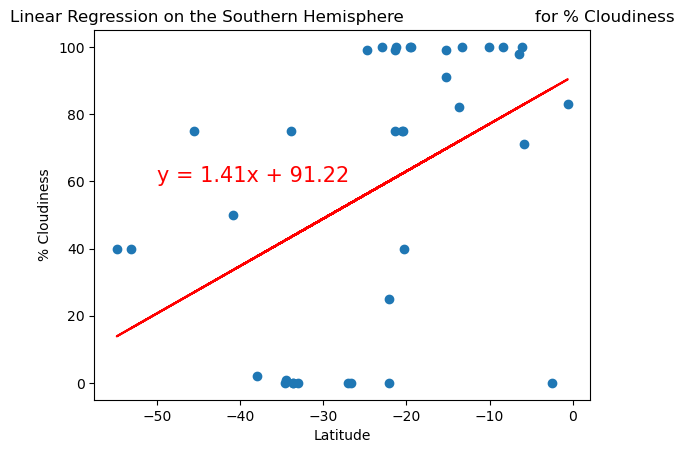

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

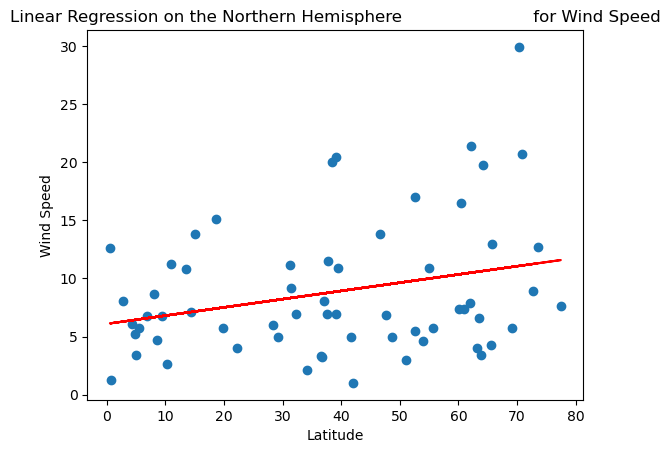

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

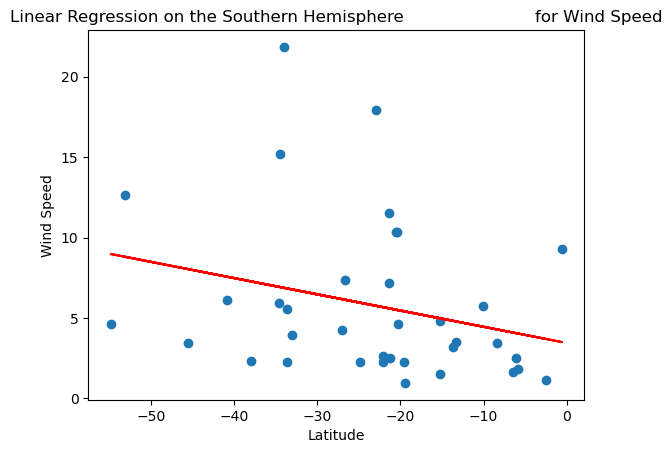

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))